# Введение в DS на УБ и МиРА (2022)

## Домашнее задание #4: Линейная регрессия

### Часть 1: Предобработка данных (2 балла)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Задание 1.** Загрузите данные из файла `weatherHistory.csv`. Выведите первые 5 строк таблицы.

In [ ]:
wh = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherHistory.csv')
wh.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Задание 2.** Изучите статью о том, что такое [apparent temperature](https://www.kxan.com/weather/difference-between-temperature-and-feels-like-temperature/) (также называемая "feels-like temperature" и "heat index"). Удалите какую-то переменную из набора данных и поясните, почему вы её удалили (помните о том, какая переменная будет целевой). Также удалите переменные:
- `Formatted Date` (потому что договорились, что не обращаем внимания на даты).
- `Daily Summary` (будем использовать просто `Summary`). 

Я выбрала переменную 'Apparent Temperature (C)', потому что данная и целевая переменные зависимы, а мы должны предсказывать температуру, не зная её, а переменная 'Apparent Temperature (C)'является подсказкой.

In [ ]:
wh = wh.drop(['Apparent Temperature (C)', 'Formatted Date', 'Daily Summary'], axis = 'columns')

**Задание 3.** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
wh.isna().sum()

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [ ]:
wh.dropna(axis=0, inplace = True)
wh

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


In [ ]:
wh['Precip Type'].isna().sum()

0



```
# Выбран кодовый формат
```

**Задание 4.** В данных есть одна числовая переменная, которая не несёт информации для предсказания целевой переменной. Найдите эту переменную, поясните ваш выбор и удалите её. 

In [ ]:
wh['Loud Cover'].unique()

array([0.])

В качестве числовой переменной для удаления я выбрала Loud Cover, так как её уникальное значение единственно и равно 0.0, соответственно она не несет информации для предсказания целевой переменной.

In [ ]:
wh = wh.drop('Loud Cover', axis = 'columns')

**Задание 5.** Постройте диаграммы рассеяния всех числовых переменных против целевой (для этого используйте какой-то метод из `seaborn`). Есть ли переменные, для которых наблюдается очевидная нелинейная зависимость?

**Подсказка:** это пригодится для частей 2 и 3.

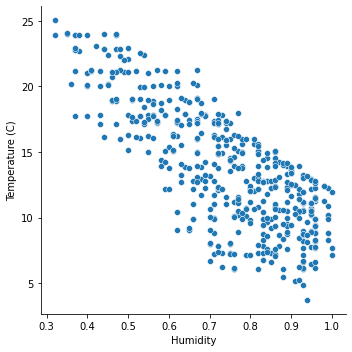

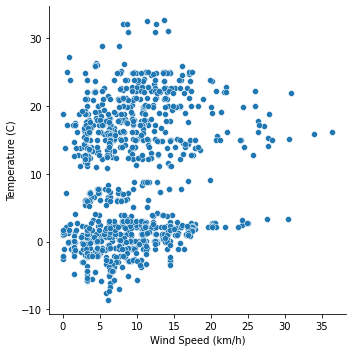

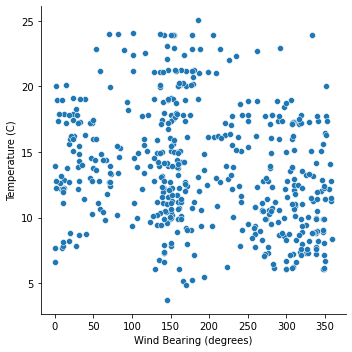

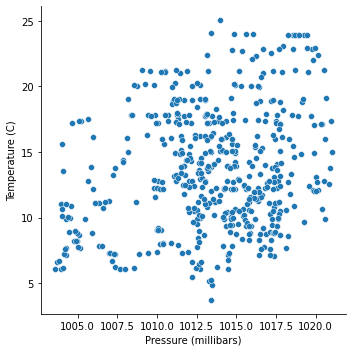

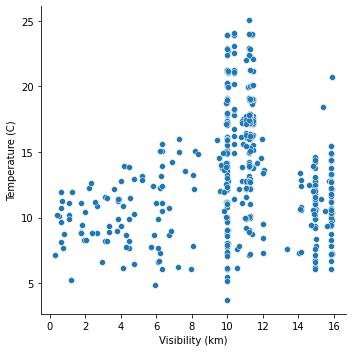

In [ ]:
seab.relplot(y="Temperature (C)", x="Humidity", data=wh[0:500])
seab.relplot(y="Temperature (C)", x="Wind Speed (km/h)", data=wh[1000:2000])
seab.relplot(y="Temperature (C)", x="Wind Bearing (degrees)", data=wh[0:500])
seab.relplot(y="Temperature (C)", x="Pressure (millibars)", data=wh[0:500])
seab.relplot(y="Temperature (C)", x="Visibility (km)", data=wh[0:500])

****Выводы****

Очевидная нелинейная зависимость наблюдается для всех пар переменных, кроме первой.

**Задание 6.** Преобразуйте категориальные переменные при помощи One Hot Encoding (то есть переведите их в дамми-переменные).

In [ ]:
my_dummy = pd.get_dummies(wh)
my_dummy

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
wh['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

**Задание 7.** Выведите корреляционную матрицу переменных. Какие переменные лучше всего коррелируют с целевой (назовите три)? 

**Подсказка:** это пригодится для частей 2 и 3.

In [ ]:
my_dummy.corr() 

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
Temperature (C),1.000000,-0.632148,0.008304,0.029937,0.393719,-0.005253,-0.009966,0.003093,-0.024854,-0.006512,...,0.300242,-0.001968,-0.004901,0.005155,-0.000044,-0.000212,-0.009072,-0.005450,0.563503,-0.563503
Humidity,-0.632148,1.000000,-0.224569,0.000814,-0.370511,0.005375,-0.011769,-0.007833,0.019885,-0.036740,...,-0.309874,0.011068,-0.007575,-0.008163,0.005449,-0.013161,-0.002897,-0.027829,-0.232622,0.232622
Wind Speed (km/h),0.008304,-0.224569,1.000000,0.104366,0.100801,-0.049453,0.073173,0.010732,0.062587,0.239942,...,-0.070561,-0.007387,0.041382,0.013736,0.031139,0.089196,0.101960,0.129135,0.067771,-0.067771
Wind Bearing (degrees),0.029937,0.000814,0.104366,1.000000,0.048900,-0.011629,0.010055,0.001578,-0.004784,0.027475,...,0.016422,0.002309,0.011245,-0.001128,-0.001955,0.013149,0.011457,0.026489,0.042142,-0.042142
Visibility (km),0.393719,-0.370511,0.100801,0.048900,1.000000,0.061011,-0.004465,-0.000294,-0.040006,0.019661,...,0.244970,-0.020997,0.000766,-0.000294,-0.013086,0.003649,-0.002886,0.007105,0.316483,-0.316483
Pressure (millibars),-0.005253,0.005375,-0.049453,-0.011629,0.061011,1.000000,-0.088882,0.000508,0.000942,-0.001585,...,0.059333,0.001233,-0.068195,0.000469,0.000486,-0.003800,0.000609,-0.011239,-0.009271,0.009271
Summary_Breezy,-0.009966,-0.011769,0.073173,0.010055,-0.004465,-0.088882,1.000000,-0.000077,-0.000453,-0.001745,...,-0.016646,-0.000242,-0.000217,-0.000077,-0.000153,-0.000453,-0.000514,-0.000627,-0.008331,0.008331
Summary_Breezy and Dry,0.003093,-0.007833,0.010732,0.001578,-0.000294,0.000508,-0.000077,1.000000,-0.000062,-0.000237,...,-0.002265,-0.000033,-0.000029,-0.000010,-0.000021,-0.000062,-0.000070,-0.000085,0.001145,-0.001145
Summary_Breezy and Foggy,-0.024854,0.019885,0.062587,-0.004784,-0.040006,0.000942,-0.000453,-0.000062,1.000000,-0.001405,...,-0.013400,-0.000195,-0.000174,-0.000062,-0.000123,-0.000365,-0.000414,-0.000505,-0.040020,0.040020
Summary_Breezy and Mostly Cloudy,-0.006512,-0.036740,0.239942,0.027475,0.019661,-0.001585,-0.001745,-0.000237,-0.001405,1.000000,...,-0.051580,-0.000751,-0.000672,-0.000237,-0.000475,-0.001405,-0.001593,-0.001944,0.014306,-0.014306


****Выводы****

У целевой переменной наблюдается корреляция с Humidity, Visibility (km), Summary_Partly Cloudy.

**Задание 8.** Разделите данные на регрессоры (`X`) и целевую переменную (`y`). Если всё сделано правильно, то `X` и `y` должны иметь размеры, указанные ниже.

In [ ]:
X = my_dummy
y = my_dummy['Temperature (C)']

In [ ]:
X = X.drop('Temperature (C)', axis = 1)

In [ ]:
print('X:', X.shape) #95936 34
print('Y:', y.shape)

X: (95936, 34)
Y: (95936,)


**Задание 8.** Похоже ли распределение целевой переменной на нормальное? Поясните, почему важно, чтобы распределение `y` было похоже на нормальное.

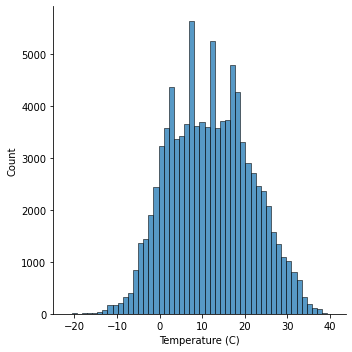

In [ ]:
seab.displot(wh, x = "Temperature (C)", binwidth=1.2, height=5)

Проверим на уровне значимости альфа = 5% гипотезу о том, что данное распределение нормальное, используя normaltest.

H0: распределение нормальное 

Н1: распредление не нормальное

In [ ]:
from scipy import stats
import scipy
scipy.stats.normaltest(wh['Temperature (C)'], axis=0, nan_policy='propagate')

NormaltestResult(statistic=2863.273985433332, pvalue=0.0)

**Выводы**

P-value < 5%, значит мы отвергаем нулевую гипотезу о том, что распределение признака "Temperature (C)" нормально.

****Почему важно, чтобы целевая переменная была распределена нормально?****

Чтобы получить более точные прогнозы.

### Часть 2: Построение объясняющей модели (4 балла)

**Задание 9.** На основании предыдущего анализа и логических соображений выберите шесть регрессоров (не считая константный), которые будут включены в объясняющую модель. Помните, что когда мы строим объясняющую модель, выбор переменных должнен быть обоснован (не достаточно использовать предыдущий анализ, выбор каждой переменной должен иметь теоретическое или логическое обоснование). В качестве регрессоров можно брать переменные из `X` или преобразования над ними (`Humidity` и `Humidity`$^2$ будем считать разными регрессорами). 

Создайте ячейку Markdown ниже и запишите в неё функциональный вид модели, которую вы будете оценивать. Поясните выбор регрессоров (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации) и, если используете, выбор нелинейных преобразований над ними.

**Пример ответа:** я строю модель

$$
y_i = \beta_0 + \beta_1 Humidity + \beta_2 Humidity^2 + \beta_3 Humidity^3 + \beta_4 Visibility (km) + \beta_5 Visibility (km) ^ 2 + \beta_6 Summary\_Breezy + \varepsilon_i
$$

Обоснование выбора переменных:
- $Humidity$ – потому что мне кажется, что влажность воздуха влияет на температуру <так-то и так-то>.
- $Humidity^2$ – потому что ...
- ...

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Я построила следующую модель:
$$
y_i = \beta_0 + \beta_1 Humidity + \beta_2 Wind Speed + \beta_3 Wind Bearing + \beta_4 Pressure + \beta_5 Summary Foggy + \beta_6 Summary Partly Cloudy + \varepsilon_i
$$

Обоснование выбора переменных:

$Humidity$ 
При конкретной температуре воздух может удерживать определённое количество влаги, однако при повышении температуры количество водяного пара, которое может содержаться в воздухе, увеличивается.

$Wind Speed$ 
При скорости ветра увеличивается диффузия, поэтому скорость теплообмена возрастает (теплый воздух снизу от земли перемещается и смешивается с холодным наверху).

$Wind Bearing$
В зависимости от направления ветра (с Юга на Север или с Севера на Юг) может меняться температура.

$Pressure$
При остывании воздуха он уменьшается в объёме, становится более плотным, его масса увеличивается и, соответственно, атмосферное давление возрастает. При повышении температуры воздуха атмосферное давление падает, при понижении температуры — возрастает. При понижении температуры на (1) °С атмосферное давление повышается на (0,28) мм рт. ст.

$Summary\_Foggy$ 
При тумане влажность воздуха повышается, что является показателем того, что температура воздуха понизилась.

$Summary\_Mostly Cloudy$ 
Летом облака закрывают солнце, что уменьшает количество солнечной энергии поступающей на землю - земля охлаждается - температура падает.


**Задание 10.** Выделите выбранные признаки в переменную `X1`. 

In [ ]:
X1 = my_dummy[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)','Summary_Foggy','Summary_Mostly Cloudy']]
X1

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Summary_Foggy,Summary_Mostly Cloudy
0,0.89,14.1197,251.0,1015.13,0,0
1,0.86,14.2646,259.0,1015.63,0,0
2,0.89,3.9284,204.0,1015.94,0,1
3,0.83,14.1036,269.0,1016.41,0,0
4,0.83,11.0446,259.0,1016.51,0,1
...,...,...,...,...,...,...
96448,0.43,10.9963,31.0,1014.36,0,0
96449,0.48,10.0947,20.0,1015.16,0,0
96450,0.56,8.9838,30.0,1015.66,0,0
96451,0.60,10.5294,20.0,1015.95,0,0


**Задание 11.** Оцените модель при помощи МНК (минимзации MSE). Прокомментируйте значимость коэффициентов.

In [ ]:
(smf.ols(formula = 'y ~ X1', data = my_dummy).fit()).params

Intercept    37.061482
X1[0]       -30.564099
X1[1]        -0.217392
X1[2]         0.003552
X1[3]        -0.000672
X1[4]        -4.916905
X1[5]         0.209068
dtype: float64

***Вывод***

Таким образом, коэффициенты детерминации x1[2] и x1[3] малы, значит, Wind Speed и Wind Bearing незначительно влияют на температуру. 

**Задание 12.** Поясните, как каждый регрессор влияет на зависимую переменную 
1. математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и 
2. содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

- Если уменьшить $x_1$ (`Humidity`) на 1, то температура станет меньше на $30~^\circ C$. Скорее всего это возникает из-за того, что при высокой влажность увеличивается скорость теплопередачи между разными слоями атмосферы и тепло уходит быстрее.

- Если уменьшить $x_2$ (`Wind speed`) на 1, то температура устанет больше на $\approx 0.21~^\circ C$. Аналогично предыдущему пункту, ветер способствует перемешиванию слоев атмосферы с различной температурой.

- Параметр $x_3$ (`Wind Bearing`) влияет на температуру незначительно. Здесь наша гипотеза о разной температуре ветра с разного направления не подтвердилась.

- Аналигично предыдущему пункту, параметр $x_4$ (`Pressure`) почти не влияет на целевую переменную.

- При уменьшении $x_5$ (`Summary_Foggy`) на 1, температура увеличится $\approx 5~^\circ C$ (но это категориальный признак, т.е. принимает только 0, либо 1). Туманность напрямую связана с влажностью, если есть туман -- значит в воздухе присутствуют насыщенные пары воды, а такое бывает только при достаточно низких температурах (если остальные условия -- нормальные).

- При уменьшении $x_6$ (`Summary_Mostly Cloudy`) на 1, температура уменьшается на $\approx 0.25^\circ C$ (но это категориальный признак, т.е. принимает только 0, либо 1). Видимо, при облачной погоде земная поверхность хуже прогревается солнечными лучами, отсюда такая зависимость.

**Задание 13.** Рассчитайте $R^2$ и MSE на выборке `X1`. Прокомментируйте качество подгонки регрессии.

In [66]:
from statsmodels.tools.eval_measures import mse

model = smf.ols(formula = 'y ~ X1', data = my_dummy).fit()
predicted = model.predict (my_dummy)
real = wh["Temperature (C)"]
print (f"MSE: {mse (predicted, real)}\nR^2: {model.rsquared}")

# Источник: https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.mse.html?highlight=mse

MSE: 51.54064302698268
R^2: 0.437309455210931


***Выводы: Качество подгонки регрессии***

Коэффициент детерминации $R^2$ = 0.44 => значит, регрессионная модель на 44% объясняет целевую переменную.

MSE = 51.5 показывает среднеквадратичную ошибку нашей модели, что является довольно большим показателем.

Таким образом, составленная нами модель не очень хороша.

### Часть 3: Построение предсказательной модели (4 балла)

В предыдущей части мы хотели объяснить $y$ при помощи каких-то регрессоров, которые мы отбирали из теоретико-логических соображений. Теперь поставим другую задачу: мы не хотим ничего объяснять, а хотим только хорошо предсказывать $y$ по новым наблюдениям. Код ниже поделит выборку (`X`, `y`) на обучающую (`X_train`, `y_train`), на которой будем *оценивать* модель, и *тестовую* (`X_test`, `y_test`), на которой будем предсказывать. 

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задание 14.** Сохраните в переменные `X_train_1` и `X_test_1` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9).

Оцените модель на выборке `X_train_1`. Сделайте предсказания на выборках `X_train_1` (то есть обучающей) и `X_test_1` (то есть тестовой). Рассчитайте `MAE` на этих выборках.

In [ ]:
X_train_1 = X_train[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)','Summary_Foggy', 'Summary_Mostly Cloudy']]
X_test_1  = X_test[ ['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)','Summary_Foggy', 'Summary_Mostly Cloudy']]


In [67]:
from statsmodels.tools.eval_measures import meanabs as mae

In [69]:
model = smf.ols(formula = 'y_train ~ X_train_1', data=X_train_1).fit()

predicted = model.predict (exog={"X_train_1": X_test_1})
real = y_test
print (f"MAE: {mae (predicted, real)}\nMSE: {mse (predicted, real)}\nR^2: {model.rsquared}")

MAE: 5.791920887569405
MSE: 51.51497994461766
R^2: 0.4366910857402918


**Задание 15.** Теперь сохраните в переменные `X_train_2` и `X_test_2` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9) и ещё какие-то признаки (количество выберите на ваш вкус, главное, чтобы всего признаков было больше, чем в `X1`). Оцените модель на выборке `X_train_2`. Сделайте предсказания на выборках `X_train_2` (то есть обучающей) и `X_test_2` (то есть тестовой). Рассчитайте `MAE` на этих выборках. Удалось ли повысить качество на обучающей выборке? А на тестовой? Поясните. 

In [ ]:
X_train_2 = X_train
X_test_2  = X_test

**Задание 16.** Прокомментируйте значимость коэффициентов модели, оценённой на `X_train_2`.

In [70]:
model = smf.ols(formula = 'y_train ~ X_train_2', data=X_train_2).fit()

predicted = model.predict (exog={"X_train_2": X_test_2})
real = y_test
print (f"MAE: {mae (predicted, real)}\nMSE: {mse (predicted, real)}\nR^2: {model.rsquared}")

MAE: 4.84343272130591
MSE: 35.10054449966701
R^2: 0.6125370757255586


**Задание 17.** Будем называть модель, оценённую на `X_train_1`, **объясняющей**, а на `X_train_2` – **предсказательной**. На основании заданий 14 и 15 сделайте вывод, подходит ли объясняющая модель для предсказаний. На основании задания 16 сделайте вывод, подходит ли предсказательная модель для объяснительной интерпретации. 

#****Выводы****

Сформированная нами объясняющая модель подходит для предсказаний, но так как значение среднеквадратичной ошибки MSE довольно высоко = 51,5, а сама модель объясняет только на 44%, то она не очень  хороша.

Предсказательная модель для интерпретации не подходит, так как не все взаимосвязи мы не можем объяснить.

## Safe Area

Это полторашка.

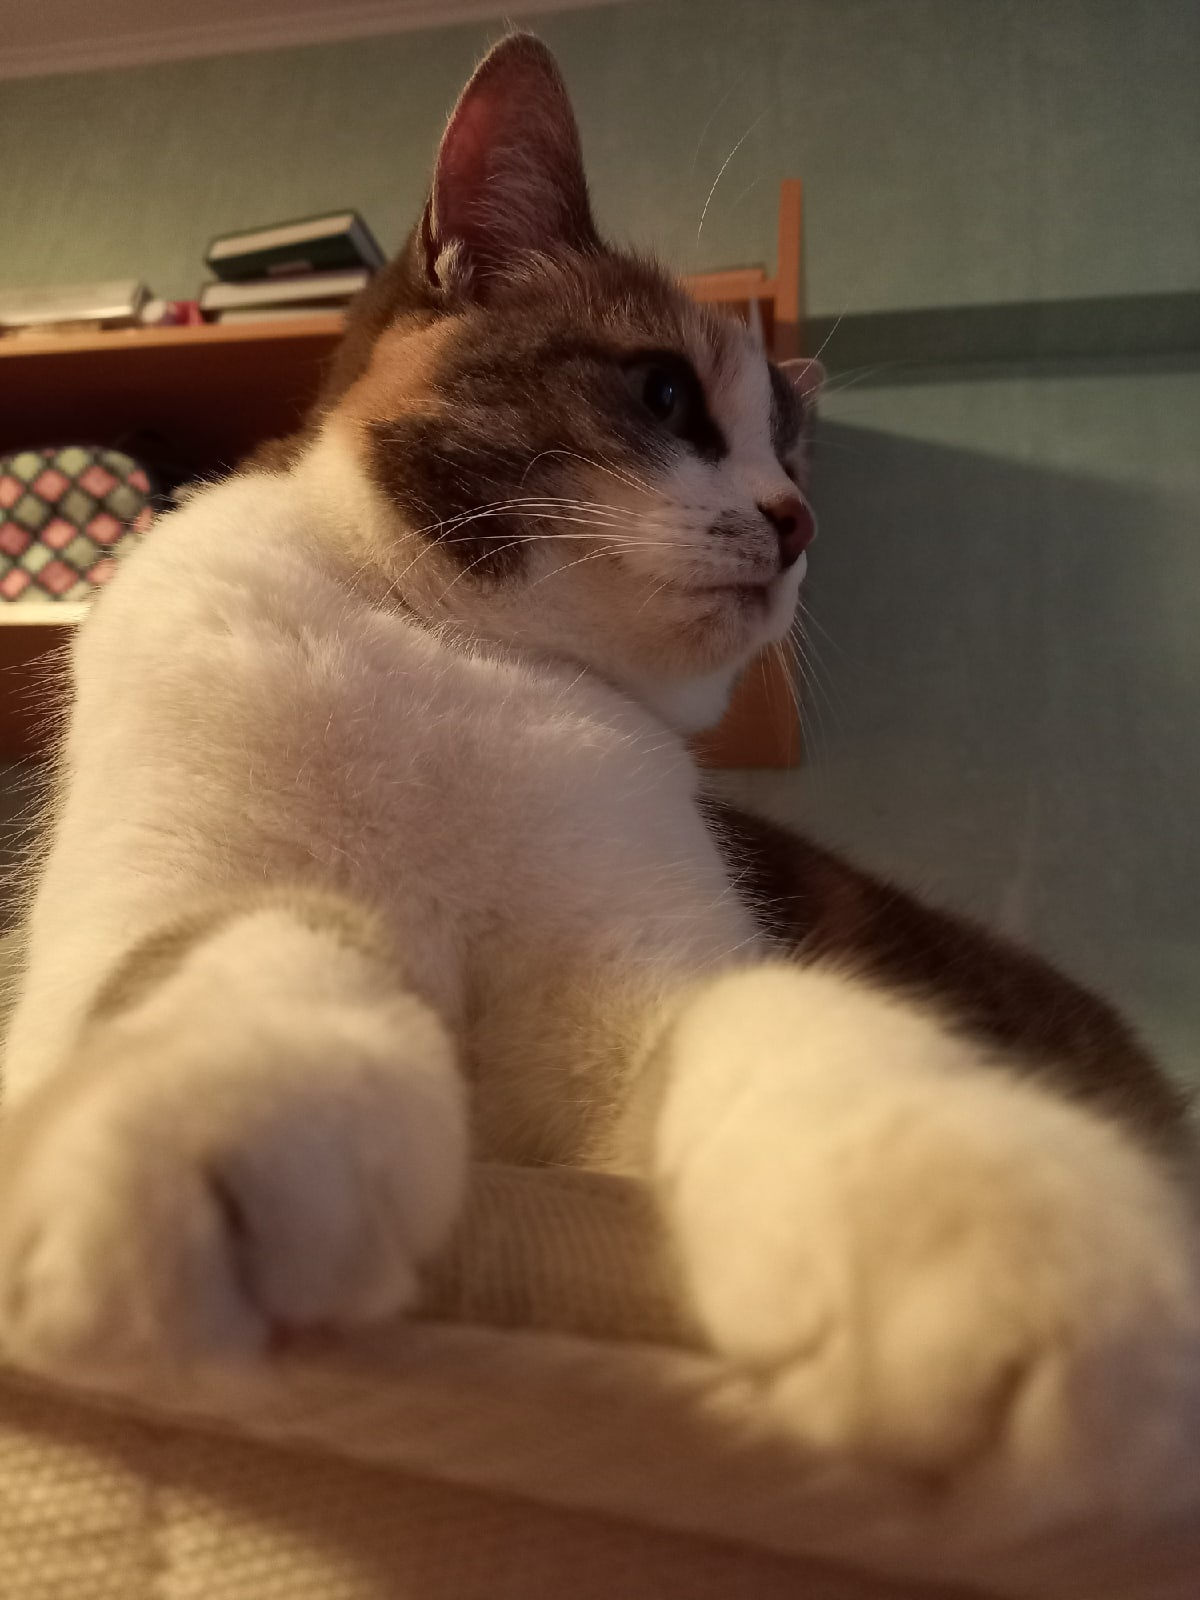